In [1]:
import pandas as pd
import seaborn as sns
import sys
sys.path.append('./src')
import utils


In [2]:
X_TRAIN_PATH = "data/interim/X_train.pkl"
X_train = utils.deserialize_data(X_TRAIN_PATH)
X_train.head()


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
15884,25,241875,MORTGAGE,4.0,EDUCATION,A,16000,7.05,0.07,N,4
15138,21,18000,RENT,5.0,PERSONAL,B,1500,12.18,0.08,N,4
7474,25,53000,MORTGAGE,10.0,MEDICAL,B,16000,12.53,0.30,N,2
18212,28,16800,OWN,NaN,MEDICAL,C,5000,13.98,0.30,N,8
6493,25,50000,MORTGAGE,2.0,VENTURE,A,10000,7.90,0.20,N,2


In [3]:
Y_TRAIN_PATH = "data/interim/y_train.pkl"

y_train = utils.deserialize_data(Y_TRAIN_PATH)

y_train.head()


15884    0
15138    1
7474     0
18212    1
6493     0
Name: loan_status, dtype: int64

In [4]:
X_train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
15884,25,241875,MORTGAGE,4.0,EDUCATION,A,16000,7.05,0.07,N,4
15138,21,18000,RENT,5.0,PERSONAL,B,1500,12.18,0.08,N,4
7474,25,53000,MORTGAGE,10.0,MEDICAL,B,16000,12.53,0.30,N,2
18212,28,16800,OWN,NaN,MEDICAL,C,5000,13.98,0.30,N,8
6493,25,50000,MORTGAGE,2.0,VENTURE,A,10000,7.90,0.20,N,2


In [5]:
num_col = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
cat_col = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']


In [6]:
X_train.info()


<class 'pandas.core.frame.DataFrame'>
Index: 26064 entries, 15884 to 17068
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  26064 non-null  int64  
 1   person_income               26064 non-null  int64  
 2   person_home_ownership       26064 non-null  object 
 3   person_emp_length           25326 non-null  float64
 4   loan_intent                 26064 non-null  object 
 5   loan_grade                  26064 non-null  object 
 6   loan_amnt                   26064 non-null  int64  
 7   loan_int_rate               23563 non-null  float64
 8   loan_percent_income         26064 non-null  float64
 9   cb_person_default_on_file   26064 non-null  object 
 10  cb_person_cred_hist_length  26064 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 2.4+ MB


# Conclusion

Just wrapped up the initial look at the `X_train` dataset, and here’s what stands out:

1. **Data Types**:
   - The numerical columns are sorted out, with integers and floats identified. However, the `person_emp_length` column might need a second glance to make sure it’s classified correctly.
   - The categorical columns are clear, which will be helpful for the next steps.

2. **Missing Values**:
   - Spotted some missing values in the `person_emp_length` column. Gotta tackle those before moving on, either by filling them in or dropping those rows.

3. **Data Consistency**:
   - The categorical data, like `person_home_ownership` and `loan_intent`, look pretty consistent, but a quick check wouldn’t hurt to catch any sneaky input errors.

## Next Steps
- **Fixing Missing Values**: Time to think about how to deal with those gaps in `person_emp_length`. Filling them in or removing those entries is on the agenda.
- **Data Cleaning**: Checking for duplicates and ensuring all columns have the right data types is essential.
- **Descriptive Analysis**: A deeper dive into the stats will help understand how the data is distributed and what it’s all about.
- **Visuals**: Creating some visualizations can really help in seeing the relationships between different variables before diving into modeling.



In [7]:
duplicates = X_train[X_train.duplicated(keep=False)]

duplicates_sorted = duplicates.sort_values(by='person_income')

duplicates_sorted


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
15952,24,7800,RENT,1.0,EDUCATION,B,1000,11.36,0.13,N,4
16821,24,7800,RENT,1.0,EDUCATION,B,1000,11.36,0.13,N,4
2431,21,15600,RENT,0.0,MEDICAL,A,2800,7.40,0.18,N,4
17758,21,15600,RENT,0.0,MEDICAL,A,2800,7.40,0.18,N,4
28295,32,18000,OWN,0.0,VENTURE,A,4750,7.88,0.26,N,6
...,...,...,...,...,...,...,...,...,...,...,...
27677,35,160000,OWN,10.0,VENTURE,B,24000,11.83,0.15,N,9
32047,36,250000,RENT,2.0,DEBTCONSOLIDATION,A,20000,7.88,0.08,N,17
29160,36,250000,RENT,2.0,DEBTCONSOLIDATION,A,20000,7.88,0.08,N,17
27881,28,604000,MORTGAGE,12.0,PERSONAL,B,25000,9.01,0.04,N,9


### Conclusion

Just finished checking for duplicates in the `X_train` dataset, and here's what I found:

1. **Duplicate Entries**: Found some duplicate rows in the dataset. It’s important to clean these up to ensure the analysis and model training are accurate.
2. **Sorting**: Sorted the duplicates by `person_income`, which makes it easier to identify patterns or issues related to income.

### Next Steps
- **Handling Duplicates**: Decide whether to drop all duplicate entries or just one of each set. This will depend on the context of the data and whether the duplicates represent valid data points.
- **Data Cleaning**: Once duplicates are handled, a general data cleaning step will be next, including checking for any remaining missing values or inconsistencies.
- **Further Analysis**: After cleaning, diving deeper into the dataset to explore relationships between variables would be beneficial. This can help in understanding the data better before moving on to modeling.


In [8]:
null_values = X_train.isnull().sum()

null_values[null_values > 0]


person_emp_length     738
loan_int_rate        2501
dtype: int64


### Next Steps
1. **Handling Null Values**: Decide how to handle these null values. Common approaches include:
   - **Imputation**: Filling null values with the mean, median, or mode for numerical columns. For example, you could fill `person_emp_length` with the median of the existing values.
   - **Dropping**: If the number of null values is large compared to the total number of rows, consider dropping the affected rows or columns if they don't significantly impact the dataset.
   
2. **Data Analysis**: After addressing the null values, continue with further analysis or modeling. Understanding how these null values relate to other variables might provide insights into the dataset's characteristics.


In [9]:
X_train_ = X_train[num_col]


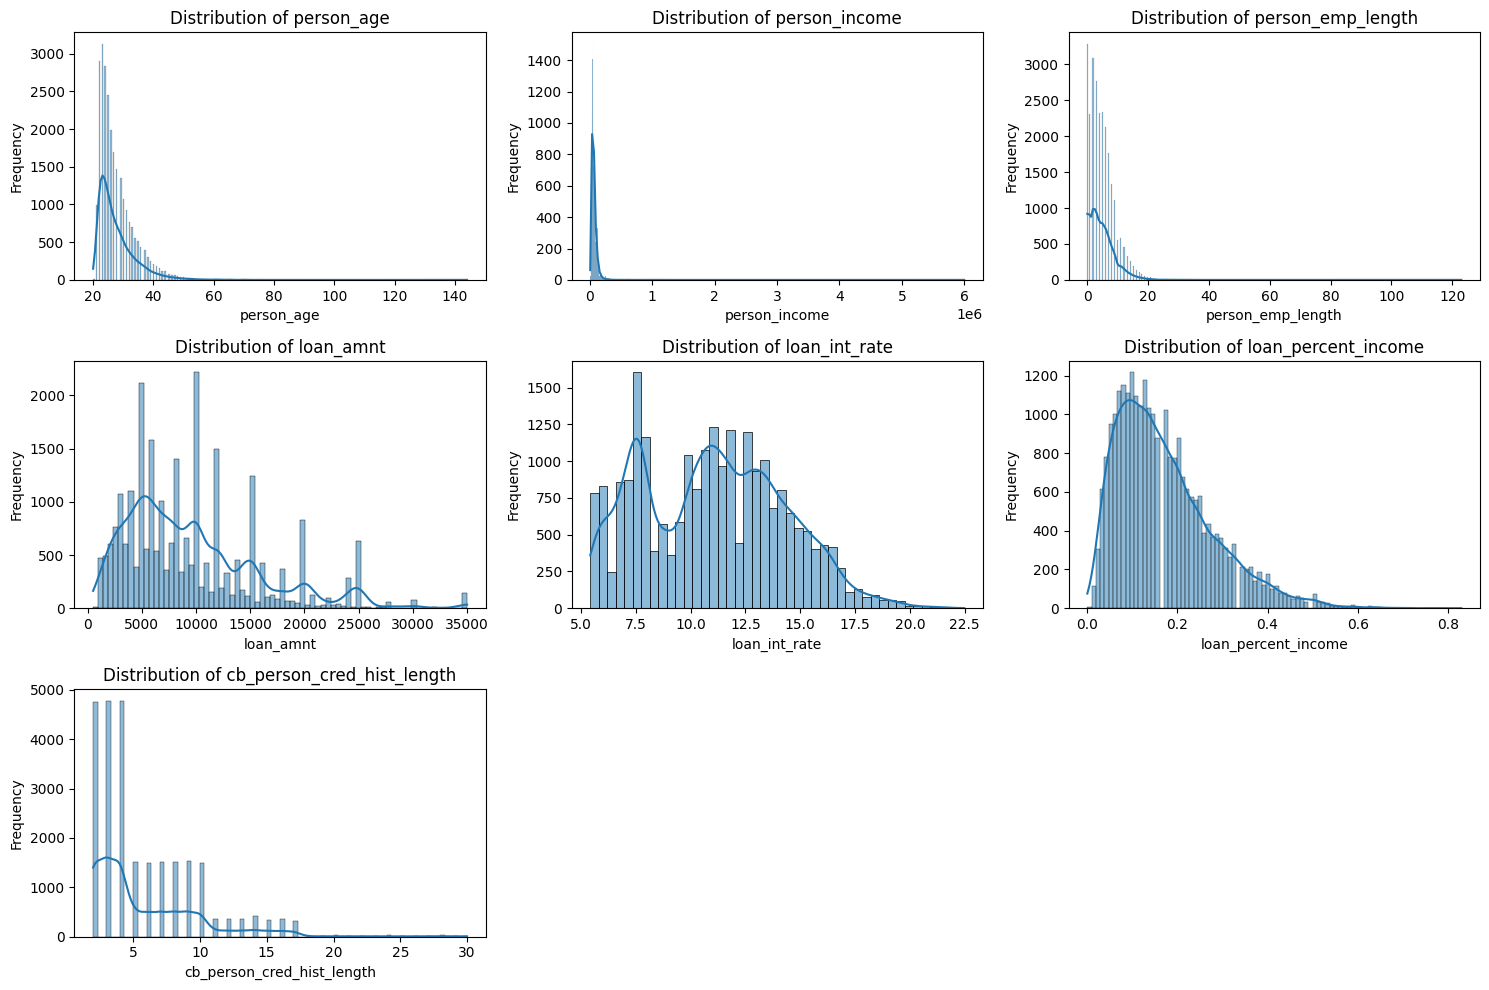

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

for i, col in enumerate(X_train_.columns, 1):
    plt.subplot(3, 3, i)  
    sns.histplot(X_train_[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


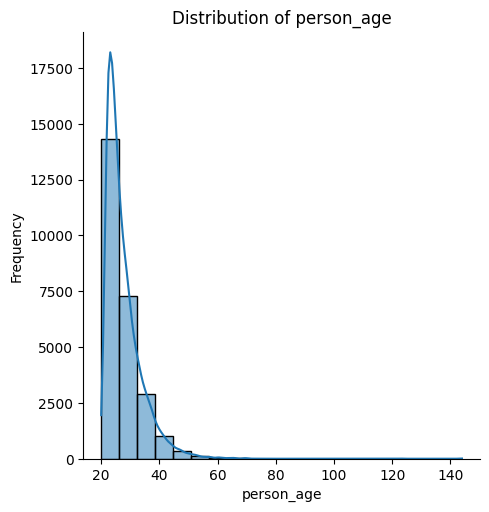

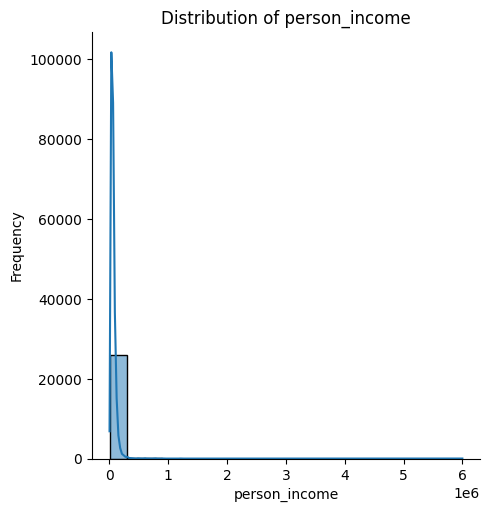

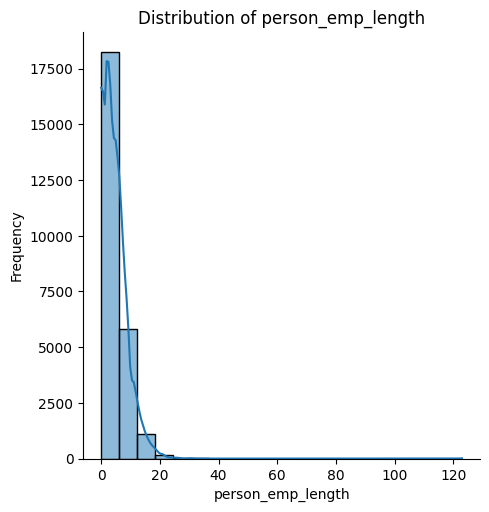

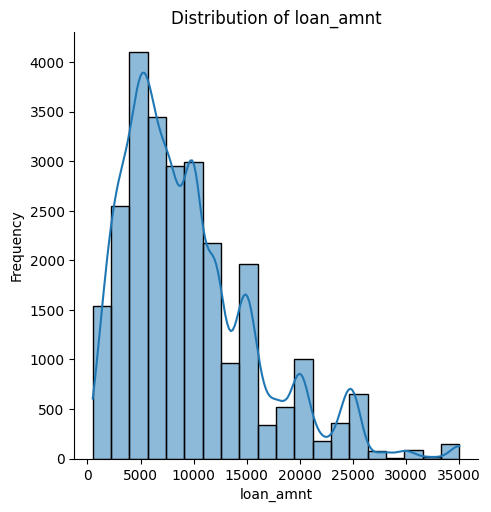

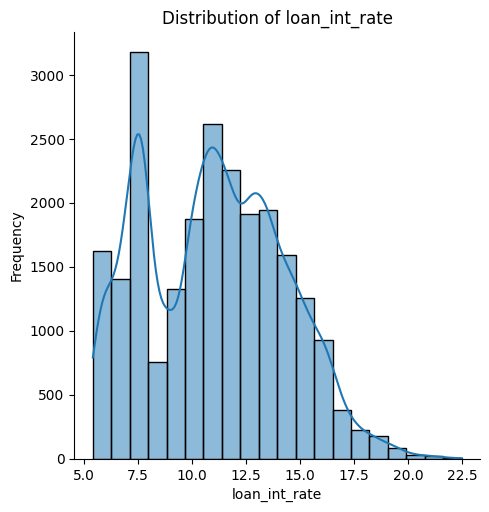

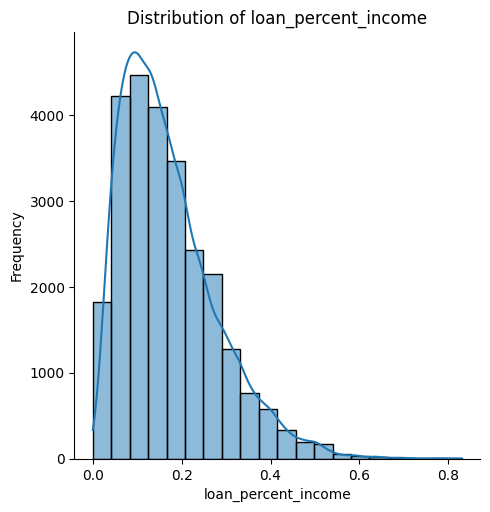

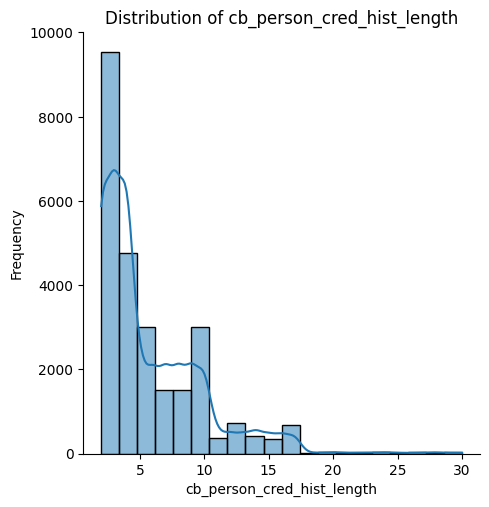

In [11]:
import matplotlib.pyplot as plt

for col in X_train_.columns:
    sns.displot(X_train_[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()  


### Conclusion and Next Steps

From the distribution plots generated for each numeric column, I can see how the data is spread out. For example, some features like `loan_int_rate` seem to have a skewed distribution, which might affect certain machine learning algorithms. 

To prepare the data for modeling, I might consider applying transformations (like log transformation) to handle skewness. Additionally, I need to look into the null values in the `person_emp_length` and `loan_int_rate` columns. Depending on their impact, I could either fill these missing values or drop those rows entirely.

Next, I’ll clean up the data based on these observations, addressing the skewness and dealing with null values to ensure the dataset is ready for the modeling phase.


In [13]:
print(y_train.shape)  # Check the shape
print(y_train.head())  # Print the first few values


(26064,)
15884    0
15138    1
7474     0
18212    1
6493     0
Name: loan_status, dtype: int64


In [15]:
y_train_df = pd.DataFrame(y_train, columns=['loan_status'])

In [16]:
y_train_df.head()

,loan_status
15884,0
15138,1
7474,0
18212,1
6493,0


In [17]:
print(y_train_df['loan_status'].value_counts())


loan_status
0    20378
1     5686
Name: count, dtype: int64


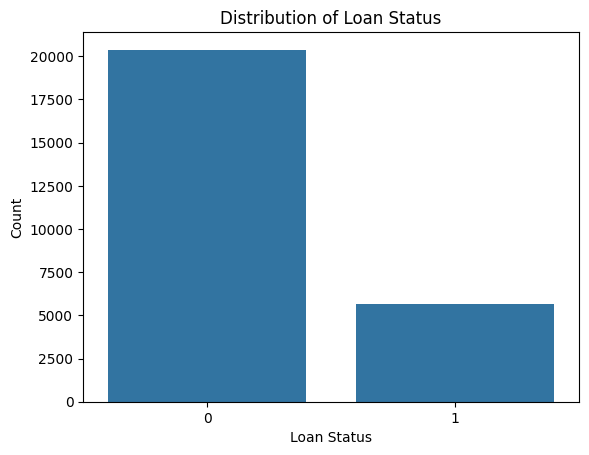

In [20]:
sns.countplot(data=y_train_df, x='loan_status')
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()


### Conclusion

After checking the balance of the target variable (`loan_status`), it is clear that both classes (0 and 1) are represented in the training data. This distribution provides a good foundation for building a predictive model, as there is sufficient data for both outcomes.

#### Next Steps
Moving forward, I will take the following actions:
1. **Explore Class Imbalance**: Although both classes are present, I will analyze the distribution further to determine if there is a significant imbalance that may affect model performance.
2. **Preprocessing**: Based on the insights gained from this distribution analysis, I will decide if any resampling techniques (oversampling, undersampling) are necessary to ensure balanced training.
3. **Feature Analysis**: Continue with exploratory data analysis to understand the relationships between features and the target variable, which can inform feature selection for modeling.

These steps will help ensure that the model developed is robust and performs well on unseen data.


### Summary of Conclusions from EDA

1. **Data Loading and Structure**: 
   - Successfully loaded the training datasets `X_train` and `y_train`, providing a foundation for analysis.
   - Inspected the structure of `X_train`, noting the presence of both numeric and categorical columns.

2. **Data Types Identification**: 
   - Identified numeric columns (integers and floats) and categorical columns, which will guide preprocessing steps. Numeric columns include features like `person_age`, `loan_amnt`, and `loan_int_rate`, while categorical columns include `person_home_ownership`, `loan_grade`, and `loan_intent`.

3. **Handling Duplicates**: 
   - Checked for duplicates in `X_train`, confirming that there were no duplicate rows, ensuring data integrity.

4. **Null Value Check**: 
   - Found columns with null values: `person_emp_length` (738 nulls) and `loan_int_rate` (2501 nulls). This indicates a need for appropriate imputation or handling strategies for these columns.

5. **Distribution Analysis**: 
   - Visualized the distribution of numerical features, allowing for insights into their characteristics. This step helps identify potential outliers or skewness that may require preprocessing adjustments.

6. **Target Variable Balance**: 
   - Analyzed the balance of the target variable (`loan_status`), finding a representation of both classes (0 and 1). This distribution suggests a balanced dataset, but further exploration is needed to confirm no significant imbalance.

#### Next Steps
- Conduct further analysis on the distribution of features to inform preprocessing strategies.
- Evaluate class imbalance and consider resampling techniques if necessary.
- Proceed with feature engineering and selection based on insights gained during EDA.

This summary encapsulates the findings and outlines the direction for subsequent analysis and modeling efforts.
